In [1]:
# %load ./dsfs/knn.py
from typing import List, NamedTuple
from collections import Counter

from dsfs.vector import Vector, distance

class LabeledPoint(NamedTuple):
    point: Vector
    label: str


def majority_vote(labels: List[str]) -> str:
    "Labels are orderd from nearest to farthest"
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count for count in vote_counts.values() if count == winner_count])
    if num_winners == 1:
        return winner
    else:
        return majority_vote(labels[:-1])


def classify(k: int, labeled_points: List[LabeledPoint], new_point: Vector) -> str:
    by_distance = sorted(labeled_points, key=lambda lp: distance(lp.point, new_point))

    k_nearest_labels = [lp.label for lp in by_distance[:k]]
    return majority_vote(k_nearest_labels)


In [2]:
from dsfs.vector import Vector
from typing import Dict
import csv
from collections import defaultdict

def parse_row(row: List[str]) -> LabeledPoint:
    floats = [float(value) for value in row[:-1]]
    label = row[-1].split('-')[-1]
    return LabeledPoint(floats, label)

with open('data/iris.data') as f:
    reader = csv.reader(f)
    iris_data = [parse_row(row) for row in reader]


points_by_species: Dict[str, List[Vector]] = defaultdict(list)
for iris in iris_data:
    points_by_species[iris.label].append(iris.point)


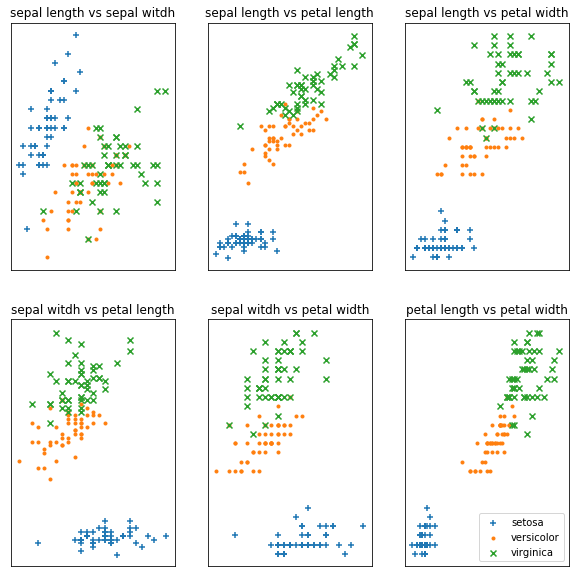

In [3]:
from matplotlib import pyplot as plt
import itertools
metrics = ['sepal length', 'sepal witdh', 'petal length', 'petal width']
pairs = list(itertools.combinations(range(4), 2))
marks = ['+', '.', 'x']  #3 classes, 3 markers

fig, ax = plt.subplots(2, 3, figsize=(10,10))
for row in range(2):
    for col in range(3):
        i, j = pairs[3 * row + col]
        ax[row][col].set_title(f"{metrics[i]} vs {metrics[j]}", fontsize=12)
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
        for mark, (species, points) in zip(marks, points_by_species.items()):
            xs = [point[i] for point in points]
            ys = [point[j] for point in points]
            ax[row][col].scatter(xs, ys, marker=mark, label=species)

ax[-1][-1].legend(loc='lower right', prop={'size': 10})
plt.show()


In [4]:
from typing import Tuple
import random

from dsfs.ml import split_data
from dsfs.knn import classify as knn_classify

random.seed(12)



iris_train, iris_test = split_data(iris_data, 0.70)

confusion_matrix: Dict[Tuple[str, str], int] = defaultdict(int)
num_correct = 0 
for iris in iris_test:
    predicted = knn_classify(
j        k=5, #Why 5? Why not 5
        labeled_points=iris_train, 
        new_point=iris.point)
    actual = iris.label
    if predicted == actual:
        num_correct += 1
    confusion_matrix[(predicted, actual)] += 1
pct_correct = num_correct/ len(iris_test)
display(f"{num_correct}/{len(iris_test)}: {pct_correct}", confusion_matrix)
    

SyntaxError: invalid syntax (<ipython-input-4-3071703a7988>, line 17)